# **Recommendation of Research Papers**

The dataset is a collection of research papers of multiple categories made from arxiv dataset.

This dataset is made in such a way to work for multi label text classification so which would be helpful for training and building the prototype for recommendation engine for research papers

## **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf
keras = tf.keras
layers = keras.layers
from sklearn.model_selection import train_test_split

from ast import literal_eval

import matplotlib.pyplot as plt

## **Loading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arxiv_data = pd.read_csv("/content/drive/MyDrive/arxiv_data.csv")

literal_eval is used for safely evaluating strings containing Python literals or container displays (e.g., lists, dictionaries) to their corresponding Python objects.

## **Analyzing the data**

In [ ]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


In [ ]:
arxiv_data.shape

(56181, 3)

In [ ]:
arxiv_data.isnull().sum()

terms        0
titles       0
abstracts    0
dtype: int64

### **Check for Duplication**

In [ ]:
arxiv_data.duplicated().sum()

15054

### **getting unique labels**

In [ ]:
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


 Here below we are removing the duplicate entries based on the "titles" (terms) column

 This filters the DataFrame, keeping only the rows where the titles are not duplicated.

In [ ]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
print(f"Number of terms with occurance as low as 1 :{sum(arxiv_data['terms'].value_counts()==1)}")
print(f"Number of unique terms: {arxiv_data['terms'].nunique()}")

There are 41105 rows in the deduplicated dataset.
Number of terms with occurance as low as 1 :2503
Number of unique terms: 3401


Here we filter the rare terms. (it keeps only those rows where the "terms" value occurs more than once in the original DataFrame.)

In [ ]:
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

Now we evaluate the given string containing a Python literal or container display (e.g., a list or dictionary) and return it's corresponding Python object.

In [ ]:
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

## **Initializing train and test split**

We have used the stratify parameter to ensure that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.

After the train and test splitting, the test set further into validation and new test sets.

In [ ]:
test_split = 0.1

train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


1. Here we created a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes

2. after the step 1 we implemented StringLookup layer using TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.

3. The lookup adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.

4. In the end we retrieve the vocabulary


In [ ]:
terms = tf.ragged.constant(train_df['terms'].values)

lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')

lookup.adapt(terms)

vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.GR', 'cs.CR', 'math.OC', 'eess.SP', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'eess.SY', 'cs.MA', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'stat.AP', 'cs.CY', 'stat.ME', 'stat.TH', 'math.ST', 'eess.AS', 'cs.SD', 'cs.DS', 'q-bio.QM', 'q-bio.NC', 'cs.CG', 'stat.CO', 'cs.GT', 'cs.NI', 'math.NA', 'cs.SE', 'cs.NA', 'I.2.6', 'physics.chem-ph', 'cs.DB', 'physics.comp-ph', 'cond-mat.dis-nn', 'q-bio.BM', 'cs.PL', 'math.PR', 'cs.LO', '68T45', 'cs.AR', 'physics.data-an', 'quant-ph', 'I.2.10', 'cs.CE', 'cond-mat.stat-mech', 'q-fin.ST', 'math.DS', 'I.4.6', 'cs.CC', '68T05', 'physics.ao-ph', 'physics.soc-ph', 'physics.med-ph', 'cs.PF', 'econ.EM', 'cs.DM', 'I.4.8', 'q-bio.GN', 'astro-ph.IM', 'physics.flu-dyn', 'math.AT', 'hep-ex', 'I.4', '68U10', 'q-fin.TR', 'physics.geo-ph', 'cs.FL', 'I.5.4', 'I.2', 'physics.optics', 'cond-mat.mtrl-sci', 'I.4.9', '68T10', 'I.4; I.5', '68T07', 'q-fin.CP', 'math.CO', 'math.AP

In [ ]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Here we designed a make_dataset function to create a dataset suitable for training a model. It takes a dataframe as input, assumes it has "abstracts" and "terms" columns, and creates a dataset of batches where each batch consists of abstract sequences and their corresponding binarized label sequences.



1.  max_seqlen: Maximum sequence length. It indicates the maximum length allowed for sequences.
2.  batch_size: Batch size. It specifies the number of samples to use in each iteration.

1.   padding_token: A token used for padding sequences.
2.  auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,





In [ ]:
max_seqlen = 150
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["terms"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [ ]:
def decode_multi_hot(label, vocab):
    decoded_labels = [vocab[i] for i, val in enumerate(label) if val == 1]
    return decoded_labels

In [ ]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    decoded_labels = decode_multi_hot(label[0], vocab)
    print(f"Label(s): {decoded_labels}")
    print(" ")

Abstract: b'One of the main challenges in the vision-based grasping is the selection of\nfeasible grasp regions while interacting with novel objects. Recent approaches\nexploit the power of the convolutional neural network (CNN) to achieve accurate\ngrasping at the cost of high computational power and time. In this paper, we\npresent a novel unsupervised learning based algorithm for the selection of\nfeasible grasp regions. Unsupervised learning infers the pattern in data-set\nwithout any external labels. We apply k-means clustering on the image plane to\nidentify the grasp regions, followed by an axis assignment method. We define a\nnovel concept of Grasp Decide Index (GDI) to select the best grasp pose in\nimage plane. We have conducted several experiments in clutter or isolated\nenvironment on standard objects of Amazon Robotics Challenge 2017 and Amazon\nPicking Challenge 2016. We compare the results with prior learning based\napproaches to validate the robustness and adaptive natu

Here we calculate the size of the vocabulary in the "abstracts" column of the train_df DataFrame and create a vocabulary with unique words

In [ ]:
vocabulary = set()
train_df["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

158922


## **Initialization of TextVectorization layer**

In [ ]:
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size,ngrams=2,output_mode="tf_idf")

text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

Mapping Vectorization to Datasets: Here below we map the text vectorization operation to
each element of the training, validation, and test datasets. This ensures that the text
data in each dataset is transformed into numerical vectors using the adapted TextVectorization layer.
The num_parallel_calls parameter is used to parallelize the mapping process, and prefetch is
applied to prefetch data batches
for better performance.

In [ ]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

## **shallow_mlpmodel  (MLP)**










Creating shallow_mlp_model (MLP) with dropout layers


1.   First hidden layer: 512 neurons, ReLU activation function, with dropout
2.   Second hidden layer: 256 neurons, ReLU activation function, with dropout.

1.   Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

In [ ]:
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

In [ ]:
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

In [ ]:
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])

Epoch 1/20
272/272 [==============================] - 34s 103ms/step - loss: 0.0491 - binary_accuracy: 0.9831 - val_loss: 0.0188 - val_binary_accuracy: 0.9945
Epoch 2/20
272/272 [==============================] - 24s 87ms/step - loss: 0.0173 - binary_accuracy: 0.9950 - val_loss: 0.0182 - val_binary_accuracy: 0.9946
Epoch 3/20
272/272 [==============================] - 30s 110ms/step - loss: 0.0136 - binary_accuracy: 0.9959 - val_loss: 0.0186 - val_binary_accuracy: 0.9946
Epoch 4/20
272/272 [==============================] - 25s 93ms/step - loss: 0.0113 - binary_accuracy: 0.9965 - val_loss: 0.0191 - val_binary_accuracy: 0.9945
Epoch 5/20
272/272 [==============================] - 25s 93ms/step - loss: 0.0096 - binary_accuracy: 0.9971 - val_loss: 0.0199 - val_binary_accuracy: 0.9945
Epoch 6/20
272/272 [==============================] - 25s 92ms/step - loss: 0.0086 - binary_accuracy: 0.9974 - val_loss: 0.0204 - val_binary_accuracy: 0.9944
Epoch 7/20
272/272 [==============================

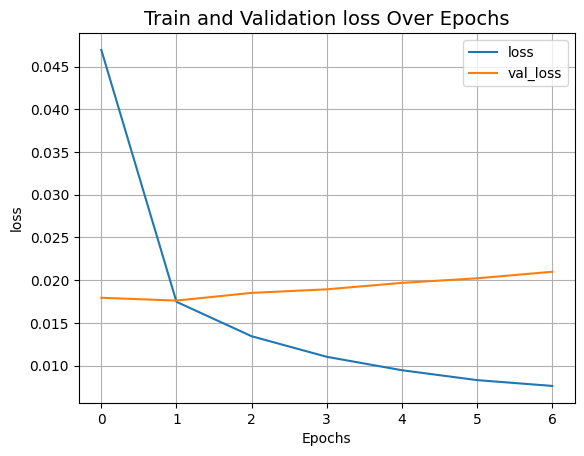

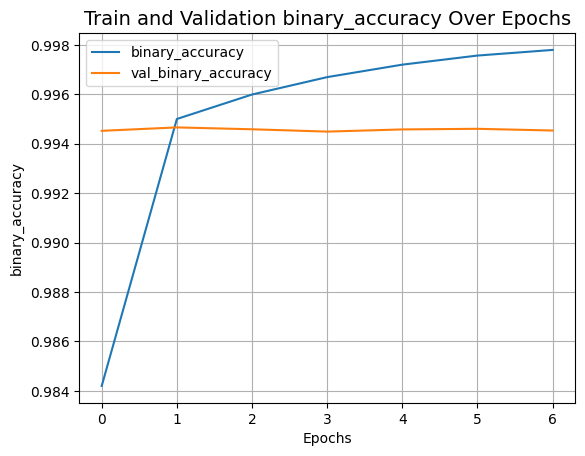

In [ ]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

### **model evaluation on test and val dataset**

In [ ]:
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 [==============================] - 1s 62ms/step - loss: 0.0182 - binary_accuracy: 0.9946
Categorical accuracy on the test set: 99.46%.
Categorical accuracy on the validation set: 99.46%.


### **Saving the model**

After traing the model we saved it in h5 file and after importing pickle we saved the configuration of the text vectorizer and vocabulary

In [ ]:
import pickle

model1.save("/content/drive/MyDrive/Models/model.h5")

saved_text_vectorizer_config = text_vectorizer.get_config()
with open("/content/drive/MyDrive/Models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)

with open("/content/drive/MyDrive/Models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Loading the model**

In [ ]:
from tensorflow import keras
import pickle

loaded_model = keras.models.load_model("/content/drive/MyDrive/Models/model.h5")

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

with open("/content/drive/MyDrive/Models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

with open("/content/drive/MyDrive/Models/text_vectorizer_weights.pkl", "wb") as f:
    pickle.dump(loaded_text_vectorizer.get_weights(), f)

In [ ]:
with open("/content/drive/MyDrive/Models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)

### **Post Processing**

Here we reverse a single multi-hot encoded label to a tuple of vocab terms.

In [ ]:
def invert_multi_hot(encoded_labels):
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(loaded_vocab, hot_indices)

Defining the function to predict categories

In [ ]:
def predict_category(abstract, model, vectorizer, label_lookup):
    preprocessed_abstract = vectorizer([abstract])
    predictions = model.predict(preprocessed_abstract)
    predicted_labels = label_lookup(predictions)
    return predicted_labels

In [ ]:
arxiv_data.drop(columns = ["terms","abstracts"], inplace = True)

In [ ]:
arxiv_data.drop_duplicates(inplace= True)
arxiv_data.reset_index(drop= True,inplace = True)

In [ ]:
pd.set_option('display.max_colwidth', None)
arxiv_data

,titles
0,Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
1,Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
2,Power up! Robust Graph Convolutional Network via Graph Powering
3,Releasing Graph Neural Networks with Differential Privacy Guarantees
4,Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
...,...
41100,An experimental study of graph-based semi-supervised classification with additional node information
41101,Bayesian Differential Privacy through Posterior Sampling
41102,Mining Spatio-temporal Data on Industrialization from Historical Registries
41103,Wav2Letter: an End-to-End ConvNet-based Speech Recognition System


## **Sentence Transformer**

we load *all-MiniLM-L6-v2*, which is a MiniLM model fine tuned on a large dataset of over 1 billion training pairs.

we initialize the *all-MiniLM-L6-v2* model from Sentence Transformers.This model is capable of encoding sentences into fixed-size vectors (embeddings).

In [ ]:
%pip install -U -q sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = arxiv_data['titles']
embeddings = model.encode(sentences)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings

array([[ 0.06643411, -0.04954601,  0.06388084, ...,  0.00106303,
        -0.12156384, -0.06962775],
       [ 0.09212264, -0.07606944,  0.06572872, ..., -0.0856517 ,
        -0.09266549,  0.00725291],
       [-0.08162688,  0.02428935,  0.01888746, ...,  0.00806164,
        -0.05129535, -0.05873996],
       ...,
       [ 0.01227976, -0.08568836, -0.02782771, ..., -0.05257976,
        -0.10806683,  0.07843307],
       [-0.07258197, -0.12690923, -0.00535551, ...,  0.03597707,
        -0.03986149, -0.05971026],
       [ 0.00768873, -0.1012418 ,  0.08909854, ..., -0.08199869,
        -0.05649742,  0.09007055]], dtype=float32)

Given loop iterates over pairs of sentences and their corresponding embeddings.

Here zip is used to iterate over both lists simultaneously.

In [ ]:
c = 0
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding length:", len(embedding))
    print("")

    if c >=5:
        break
    c +=1

Sentence: Multi-Level Attention Pooling for Graph Neural Networks: Unifying Graph Representations with Multiple Localities
Embedding length: 384

Sentence: Decision Forests vs. Deep Networks: Conceptual Similarities and Empirical Differences at Small Sample Sizes
Embedding length: 384

Sentence: Power up! Robust Graph Convolutional Network via Graph Powering
Embedding length: 384

Sentence: Releasing Graph Neural Networks with Differential Privacy Guarantees
Embedding length: 384

Sentence: Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Embedding length: 384

Sentence: Lifelong Graph Learning
Embedding length: 384



### Saving sentences and corresponding embeddings

In [ ]:
import pickle

with open('/content/drive/MyDrive/Models/embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

with open('/content/drive/MyDrive/Models/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('/content/drive/MyDrive/Models/rec_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### load save files

In [ ]:
embeddings = pickle.load(open('/content/drive/MyDrive/Models/embeddings.pkl','rb'))
sentences = pickle.load(open('/content/drive/MyDrive/Models/sentences.pkl','rb'))
rec_model = pickle.load(open('/content/drive/MyDrive/Models/rec_model.pkl','rb'))

In [ ]:
%pip install torch

## **Recommendation Result**

In recommendation function:



1.  We Calculate cosine similarity scores between the embeddings of input_paper and all papers in the dataset.
2.  It gets the indices of the top-k most similar papers based on cosine similarity.(We gave K as 5)

1.   Retrieve the titles of the top similar papers.





In [ ]:
import torch

def recommendation(input_paper):
    cosine_scores = util.cos_sim(embeddings, rec_model.encode(input_paper))
    top_similar_papers = torch.topk(cosine_scores, dim=0, k=5, sorted=True)
    papers_list = []
    for i in top_similar_papers.indices:
        papers_list.append(sentences[i.item()])
    return papers_list

In [ ]:
input_paper = input("Enter the title of any paper you like")
recommend_papers = recommendation(input_paper)

print("We recommend to read this paper............")
print("=============================================")
for paper in recommend_papers:
    print(paper)

Enter the title of any paper you likeRecurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
We recommend to read this paper............
Recurrence-Aware Long-Term Cognitive Network for Explainable Pattern Classification
Long Short-term Cognitive Networks
Adaptive Explainable Neural Networks (AxNNs)
Explainable Multivariate Time Series Classification: A Deep Neural Network Which Learns To Attend To Important Variables As Well As Informative Time Intervals
Evaluating Recurrent Neural Network Explanations
